In [ ]:
#@title Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
# https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

# Multiple Layer GRU

In [23]:
from __future__ import absolute_import, division, print_function, unicode_literals


import tensorflow_datasets as tfds
import tensorflow as tf
print(tf.__version__)

2.3.0


In [24]:
import tensorflow_datasets as tfds
import tensorflow as tf
print(tf.__version__)

2.3.0


In [25]:
# Get the data
dataset, info = tfds.load('imdb_reviews/subwords8k', with_info=True, as_supervised=True)
train_dataset, test_dataset = dataset['train'], dataset['test']


In [26]:
tokenizer = info.features['text'].encoder

In [27]:
BUFFER_SIZE = 10000
BATCH_SIZE = 64

train_dataset = train_dataset.shuffle(BUFFER_SIZE)
train_dataset = train_dataset.padded_batch(BATCH_SIZE, train_dataset.output_shapes)
test_dataset = test_dataset.padded_batch(BATCH_SIZE, test_dataset.output_shapes)

In [28]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(tokenizer.vocab_size, 64),
    tf.keras.layers.Conv1D(128, 5, activation='relu'),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [29]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_4 (Embedding)      (None, None, 64)          523840    
_________________________________________________________________
conv1d_4 (Conv1D)            (None, None, 128)         41088     
_________________________________________________________________
global_average_pooling1d_4 ( (None, 128)               0         
_________________________________________________________________
dense_8 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_9 (Dense)              (None, 1)                 65        
Total params: 573,249
Trainable params: 573,249
Non-trainable params: 0
_________________________________________________________________


In [30]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [31]:
NUM_EPOCHS = 10
history = model.fit(train_dataset, epochs=NUM_EPOCHS, validation_data=test_dataset)

Epoch 1/10
391/391 [==============================] - 26s 65ms/step - loss: 0.4522 - accuracy: 0.7760 - val_loss: 0.3060 - val_accuracy: 0.8790
Epoch 2/10
391/391 [==============================] - 17s 44ms/step - loss: 0.2237 - accuracy: 0.9171 - val_loss: 0.3074 - val_accuracy: 0.8759
Epoch 3/10
391/391 [==============================] - 16s 41ms/step - loss: 0.1693 - accuracy: 0.9390 - val_loss: 0.3181 - val_accuracy: 0.8745
Epoch 4/10
391/391 [==============================] - 15s 39ms/step - loss: 0.1376 - accuracy: 0.9510 - val_loss: 0.3758 - val_accuracy: 0.8697
Epoch 5/10
391/391 [==============================] - 15s 39ms/step - loss: 0.1080 - accuracy: 0.9640 - val_loss: 0.4364 - val_accuracy: 0.8646
Epoch 6/10
391/391 [==============================] - 15s 38ms/step - loss: 0.0857 - accuracy: 0.9728 - val_loss: 0.4697 - val_accuracy: 0.8620
Epoch 7/10
391/391 [==============================] - 15s 38ms/step - loss: 0.0691 - accuracy: 0.9785 - val_loss: 0.5279 - val_accuracy:

In [32]:
import matplotlib.pyplot as plt


def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()

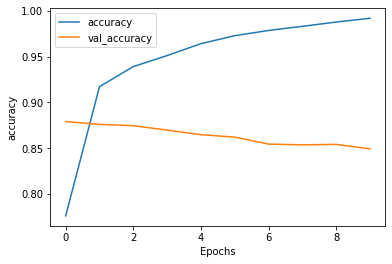

In [33]:
plot_graphs(history, 'accuracy')

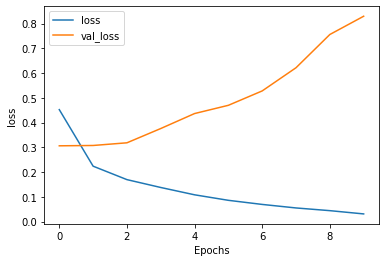

In [34]:
plot_graphs(history, 'loss')